# **PySpark Notes -- by Arun Kumar**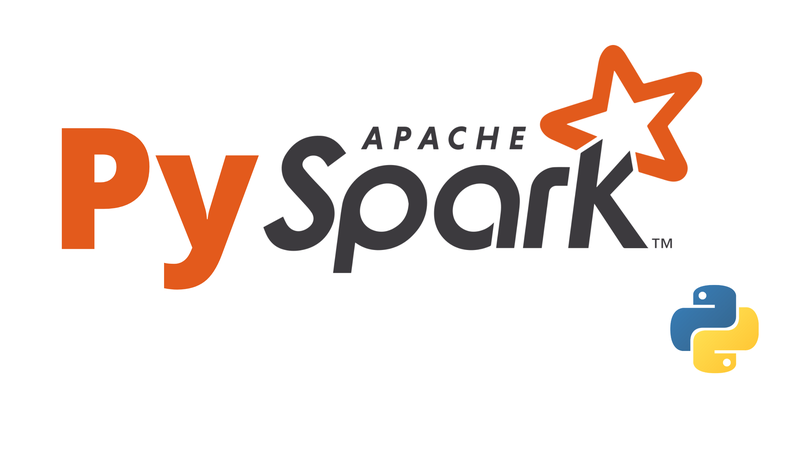

In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=cdd81d1d466b2885300001e3379a299947bdabc3329a0a37a24433a7afd05050
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


# **Pyspark Dataframe**

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('dataframe').getOrCreate()     #spark session

In [4]:
spark

## **real the dataset**

In [5]:
# option 1

df = spark.read.option('header','true').csv('test1.csv',inferSchema=True)

In [6]:
df.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [7]:
# option 2

df = spark.read.csv('test1.csv', header=True, inferSchema=True)
df.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



## **check the schema**

In [8]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



## **check type of the dataframe**

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

## **check all columns in dataframe**

In [10]:
df.columns

['Name', 'age', 'Experience', 'Salary']

## **check rows of the dataframe**

In [11]:
df.head(3)

[Row(Name='Krish', age=31, Experience=10, Salary=30000),
 Row(Name='Sudhanshu', age=30, Experience=8, Salary=25000),
 Row(Name='Sunny', age=29, Experience=4, Salary=20000)]

In [12]:
df.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



## **select a particular column**

In [13]:
df.select('Name')

DataFrame[Name: string]

In [14]:
df.select('Name').show()

+---------+
|     Name|
+---------+
|    Krish|
|Sudhanshu|
|    Sunny|
|     Paul|
|   Harsha|
|  Shubham|
+---------+



## **select multiple coulmns**

In [15]:
df.select(['Name','Experience'])

DataFrame[Name: string, Experience: int]

In [16]:
df.select(['Name','Experience']).show()

+---------+----------+
|     Name|Experience|
+---------+----------+
|    Krish|        10|
|Sudhanshu|         8|
|    Sunny|         4|
|     Paul|         3|
|   Harsha|         1|
|  Shubham|         2|
+---------+----------+



## **description & dtype of the coulmns**

In [17]:
df.dtypes

[('Name', 'string'), ('age', 'int'), ('Experience', 'int'), ('Salary', 'int')]

In [18]:
df.describe()

DataFrame[summary: string, Name: string, age: string, Experience: string, Salary: string]

In [19]:
df.describe().show()

+-------+------+------------------+-----------------+------------------+
|summary|  Name|               age|       Experience|            Salary|
+-------+------+------------------+-----------------+------------------+
|  count|     6|                 6|                6|                 6|
|   mean|  NULL|26.333333333333332|4.666666666666667|21333.333333333332|
| stddev|  NULL| 4.179314138308661|3.559026084010437| 5354.126134736337|
|    min|Harsha|                21|                1|             15000|
|    max| Sunny|                31|               10|             30000|
+-------+------+------------------+-----------------+------------------+



## **Adding columns in dataframe**

In [20]:
df = df.withColumn('Ecperience after 2 years', df['Experience'] + 2)
df

DataFrame[Name: string, age: int, Experience: int, Salary: int, Ecperience after 2 years: int]

In [21]:
df.show()

+---------+---+----------+------+------------------------+
|     Name|age|Experience|Salary|Ecperience after 2 years|
+---------+---+----------+------+------------------------+
|    Krish| 31|        10| 30000|                      12|
|Sudhanshu| 30|         8| 25000|                      10|
|    Sunny| 29|         4| 20000|                       6|
|     Paul| 24|         3| 20000|                       5|
|   Harsha| 21|         1| 15000|                       3|
|  Shubham| 23|         2| 18000|                       4|
+---------+---+----------+------+------------------------+



## **dropping columns in dataframe**

In [22]:
df = df.drop('Ecperience after 2 years')
df

DataFrame[Name: string, age: int, Experience: int, Salary: int]

In [23]:
df.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



## **renaming columns in dataframe**

In [24]:
df = df.withColumnRenamed('Name','new name')
df

DataFrame[new name: string, age: int, Experience: int, Salary: int]

In [25]:
df.show()

+---------+---+----------+------+
| new name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [26]:
df2 = spark.read.csv('test2.csv', header=True, inferSchema=True)

In [27]:
df2.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



## **dropping the null values**

In [28]:
df2.na.drop().show()      # drop all rows which has NULL values present.

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [29]:
# how == all

df2.na.drop(how = "all").show()        #suppose you have all values NULL in a row then only it going to be drop.

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [30]:
# how == any

df2.na.drop(how = "any").show()   #weather it is 1 or 2 NULL values it going to drop complete row.

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [31]:
# threshold

df2.na.drop(how = "any", thresh=2).show()      #says that atleast two not null values should be present, if not it deleated.

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
+---------+----+----------+------+



In [32]:
# subset

df2.na.drop(how = "any", subset=['Experience']).show()      #when you want to remove NULL values wuth respect to a specific coulme.

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
+---------+---+----------+------+



## **filling the null values**

In [33]:
df2.na.fill('missing').show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|  missing|  34|        10| 38000|
|  missing|  36|      NULL|  NULL|
+---------+----+----------+------+



In [34]:
df2.na.fill('missing',['Name','age']).show()     #when you try to fill null values for a specific columns

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|  missing|  34|        10| 38000|
|  missing|  36|      NULL|  NULL|
+---------+----+----------+------+



In [35]:
df2.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [36]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['age', 'Experience','Salary'],
    outputCols=["{}_imputes".format(c) for c in ['age', 'Experience','Salary']]
).setStrategy("mean")

In [37]:
# add inputation cols to df

imputer.fit(df2).transform(df2).show()

+---------+----+----------+------+-----------+------------------+--------------+
|     Name| age|Experience|Salary|age_imputes|Experience_imputes|Salary_imputes|
+---------+----+----------+------+-----------+------------------+--------------+
|    Krish|  31|        10| 30000|         31|                10|         30000|
|Sudhanshu|  30|         8| 25000|         30|                 8|         25000|
|    Sunny|  29|         4| 20000|         29|                 4|         20000|
|     Paul|  24|         3| 20000|         24|                 3|         20000|
|   Harsha|  21|         1| 15000|         21|                 1|         15000|
|  Shubham|  23|         2| 18000|         23|                 2|         18000|
|   Mahesh|NULL|      NULL| 40000|         28|                 5|         40000|
|     NULL|  34|        10| 38000|         34|                10|         38000|
|     NULL|  36|      NULL|  NULL|         36|                 5|         25750|
+---------+----+----------+-

# **filter operations**

In [38]:
df.show()

+---------+---+----------+------+
| new name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [39]:
# salary of people less then or equal to 20000

df.filter("Salary<=20000").show()

+--------+---+----------+------+
|new name|age|Experience|Salary|
+--------+---+----------+------+
|   Sunny| 29|         4| 20000|
|    Paul| 24|         3| 20000|
|  Harsha| 21|         1| 15000|
| Shubham| 23|         2| 18000|
+--------+---+----------+------+



In [40]:
df.filter("Salary<=20000").select(['new name','age']).show()

+--------+---+
|new name|age|
+--------+---+
|   Sunny| 29|
|    Paul| 24|
|  Harsha| 21|
| Shubham| 23|
+--------+---+



In [41]:
df.filter((df['Salary']<=20000) | (df['Salary']<=15000)).show()

+--------+---+----------+------+
|new name|age|Experience|Salary|
+--------+---+----------+------+
|   Sunny| 29|         4| 20000|
|    Paul| 24|         3| 20000|
|  Harsha| 21|         1| 15000|
| Shubham| 23|         2| 18000|
+--------+---+----------+------+



# **Group by & Aggregate functions**

In [42]:
df3 = spark.read.csv('test3.csv',header=True, inferSchema=True)

In [43]:
df3.show()

+---------+------------+------+
|     Name| Departments|salary|
+---------+------------+------+
|    Krish|Data Science| 10000|
|    Krish|         IOT|  5000|
|   Mahesh|    Big Data|  4000|
|    Krish|    Big Data|  4000|
|   Mahesh|Data Science|  3000|
|Sudhanshu|Data Science| 20000|
|Sudhanshu|         IOT| 10000|
|Sudhanshu|    Big Data|  5000|
|    Sunny|Data Science| 10000|
|    Sunny|    Big Data|  2000|
+---------+------------+------+



In [44]:
df3.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Departments: string (nullable = true)
 |-- salary: integer (nullable = true)



## **group by**

In [48]:
# groupby to find the max salary

df3.groupBy('Name').sum().show()

+---------+-----------+
|     Name|sum(salary)|
+---------+-----------+
|Sudhanshu|      35000|
|    Sunny|      12000|
|    Krish|      19000|
|   Mahesh|       7000|
+---------+-----------+



In [49]:
# groupby dept which gives max salary

df3.groupBy('Departments').sum().show()

+------------+-----------+
| Departments|sum(salary)|
+------------+-----------+
|         IOT|      15000|
|    Big Data|      15000|
|Data Science|      43000|
+------------+-----------+



In [50]:
df3.groupBy('Departments').mean().show()

+------------+-----------+
| Departments|avg(salary)|
+------------+-----------+
|         IOT|     7500.0|
|    Big Data|     3750.0|
|Data Science|    10750.0|
+------------+-----------+



In [51]:
df3.groupBy('Departments').count().show()

+------------+-----+
| Departments|count|
+------------+-----+
|         IOT|    2|
|    Big Data|    4|
|Data Science|    4|
+------------+-----+



In [53]:
df3.agg({'Salary':'sum'}).show()

+-----------+
|sum(Salary)|
+-----------+
|      73000|
+-----------+



# **Pyspark MLlib**




In [55]:
training = spark.read.csv('test1.csv', header=True, inferSchema=True)

In [56]:
training.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [57]:
training.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [58]:
training.columns

['Name', 'age', 'Experience', 'Salary']

In [59]:
from pyspark.ml.feature import VectorAssembler

featureassembler = VectorAssembler(inputCols=['age' , 'Experience'], outputCol='independent features')

In [60]:
output = featureassembler.transform(training)

In [61]:
output.show()

+---------+---+----------+------+--------------------+
|     Name|age|Experience|Salary|independent features|
+---------+---+----------+------+--------------------+
|    Krish| 31|        10| 30000|         [31.0,10.0]|
|Sudhanshu| 30|         8| 25000|          [30.0,8.0]|
|    Sunny| 29|         4| 20000|          [29.0,4.0]|
|     Paul| 24|         3| 20000|          [24.0,3.0]|
|   Harsha| 21|         1| 15000|          [21.0,1.0]|
|  Shubham| 23|         2| 18000|          [23.0,2.0]|
+---------+---+----------+------+--------------------+



In [62]:
output.columns

['Name', 'age', 'Experience', 'Salary', 'independent features']

In [63]:
finalized_data = output.select('independent features','Salary')

In [64]:
finalized_data.show()

+--------------------+------+
|independent features|Salary|
+--------------------+------+
|         [31.0,10.0]| 30000|
|          [30.0,8.0]| 25000|
|          [29.0,4.0]| 20000|
|          [24.0,3.0]| 20000|
|          [21.0,1.0]| 15000|
|          [23.0,2.0]| 18000|
+--------------------+------+



In [65]:
from pyspark.ml.regression import LinearRegression

In [67]:
# train test split

train_data,test_data = finalized_data.randomSplit([0.75,0.25])

regressor = LinearRegression(featuresCol='independent features', labelCol='Salary')

regressor = regressor.fit(train_data)

In [68]:
# coefficients

regressor.coefficients

DenseVector([-526.3158, 2105.2632])

In [69]:
# intercepts
regressor.intercept

24868.421052634418

# **prediction**

In [70]:
pred = regressor.evaluate(test_data)

In [71]:
pred.predictions.show()

+--------------------+------+-----------------+
|independent features|Salary|       prediction|
+--------------------+------+-----------------+
|          [23.0,2.0]| 18000|16973.68421052624|
|          [29.0,4.0]| 20000|18026.31578947309|
+--------------------+------+-----------------+



In [72]:
pred.meanAbsoluteError, pred.meanSquaredError

(1500.0000000003347, 2474376.731303189)